# Internshala Internship Dataset

Dataset source : https://www.kaggle.com/datasets/ghosh153/internshala-internship-dataset

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [259]:
df = pd.read_csv(r"internship companies.csv")

#### first 5 rows

In [175]:
df.head()

,Unnamed: 0,company,internship,location,start date,duration,stipend,posted on,apply by
0,0,Internshala,Web Development,Gurgaon,Immediately,6 Months,20000 /month,29 Feb'20,18 Apr'20
1,1,Delhi Technological University - Karyon,Campus Ambassador,Work From Home,Immediately,1 Month,Performance Based,18 Feb'20,19 Apr'20
2,2,Internshala,Operations,Gurgaon,15 Apr'20,6 Months,20000 /month,18 Mar'20,29 Apr'20
3,3,Your Digital Boat,Content Writing,Work From Home,Immediately,2 Months,5000 /month,10 Apr'20,8 May'20
4,4,American Institute Of Big Data Professionals,Web Development,Work From Home,Immediately,1 Month,2000-5000 /month,10 Apr'20,8 May'20


#### random rows

In [252]:
df.sample(5)

,company,internship,location,start date,duration,stipend,posted on,apply by
6066,Enteraction Web Solutions LLP,Data Entry,Delhi,Immediately,6,7000,20 Mar'20,18 Apr'20
5899,Revalsys Technologies India Private Limited,Software Testing,Hyderabad,Immediately,2,2000,20 Mar'20,18 Apr'20
9563,Digital Edge,Content Writing,Delhi,Immediately,2,20000,13 Mar'20,10 Apr'20
3971,Commondove,Cartooning,Work From Home,Immediately,3,Unpaid,29 Mar'20,26 Apr'20
10563,LEMON CHILLI MEDIA SOLUTIONS,Graphic Design,Delhi,Immediately,6,5000,11 Mar'20,14 Apr'20


#### Name of all columns

In [176]:
df.columns

Index(['Unnamed: 0', 'company', 'internship', 'location', 'start date',
       'duration', 'stipend', 'posted on', 'apply by'],
      dtype='object')

#### Dropping index column

In [177]:
df.drop(columns=["Unnamed: 0"],axis=0,inplace=True)

## Getting overview of data

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12001 entries, 0 to 12000
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   company     11999 non-null  object
 1   internship  12000 non-null  object
 2   location    11997 non-null  object
 3   start date  11999 non-null  object
 4   duration    11999 non-null  object
 5   stipend     11999 non-null  object
 6   posted on   11999 non-null  object
 7   apply by    11999 non-null  object
dtypes: object(8)
memory usage: 750.2+ KB


In [179]:
df.describe(include="all")

,company,internship,location,start date,duration,stipend,posted on,apply by
count,11999,12000,11997,11999,11999,11999,11999,11999
unique,6473,1631,254,121,16,395,53,53
top,Protiviti,Business Development (Sales),Work From Home,Immediately,3 Months,5000 /month,16 Mar'20,14 Apr'20
freq,40,1388,4454,11765,4301,1685,843,1304


#### Checking for Null values and dropping due to low proportion

In [180]:
df.isna().sum()

company       2
internship    1
location      4
start date    2
duration      2
stipend       2
posted on     2
apply by      2
dtype: int64

In [181]:
df.dropna(inplace=True)

In [182]:
df.shape

(11997, 8)

#### deleting row having duration=="No"

In [183]:
df[df["duration"]=="No"].index

Int64Index([], dtype='int64')

In [184]:
df.drop(4699,inplace=True)

### Data Cleaning

#### Extracting number of months from duration

In [185]:
def extract(x):
    x = str(x)
    return int(x[:2])

In [186]:
df.duration = df.duration.apply(extract)

In [187]:
df

,company,internship,location,start date,duration,stipend,posted on,apply by
0,Internshala,Web Development,Gurgaon,Immediately,6,20000 /month,29 Feb'20,18 Apr'20
1,Delhi Technological University - Karyon,Campus Ambassador,Work From Home,Immediately,1,Performance Based,18 Feb'20,19 Apr'20
2,Internshala,Operations,Gurgaon,15 Apr'20,6,20000 /month,18 Mar'20,29 Apr'20
3,Your Digital Boat,Content Writing,Work From Home,Immediately,2,5000 /month,10 Apr'20,8 May'20
4,American Institute Of Big Data Professionals,Web Development,Work From Home,Immediately,1,2000-5000 /month,10 Apr'20,8 May'20
...,...,...,...,...,...,...,...,...
11996,DBuzzz,Business Development (Sales),Lucknow,Immediately,2,5000 /month,20 Feb'20,14 Apr'20
11997,DataSmart eServices Private Limited,MEAN Stack Development,Hyderabad,Immediately,4,7000-10000 /month,20 Feb'20,10 Apr'20
11998,Study Sure,Content Writing,Work From Home,Immediately,3,8000-15000 /month,20 Feb'20,10 Apr'20
11999,Zifcare,Psychology,Work From Home,Immediately,3,3000 /month,20 Feb'20,10 Apr'20


#### Extracting salary and converting to integer value

In [207]:
def salary_extract(x):
    if x=="AED 1000 /month":
        return 1000
    elif x=="Not provided" and x=="Unpaid":
        return 0
    elif x!="Performance Based" and x!="Unpaid":
        x = str(x)
        x = x.split()[0]
        y = x.split("/")[0]
        y = y.split("-")
        return int(y[0])
    else:
        return x

In [208]:
df.stipend = df.stipend.apply(salary_extract)

In [209]:
df

,company,internship,location,start date,duration,stipend,posted on,apply by
0,Internshala,Web Development,Gurgaon,Immediately,6,20000,29 Feb'20,18 Apr'20
1,Delhi Technological University - Karyon,Campus Ambassador,Work From Home,Immediately,1,Performance Based,18 Feb'20,19 Apr'20
2,Internshala,Operations,Gurgaon,15 Apr'20,6,20000,18 Mar'20,29 Apr'20
3,Your Digital Boat,Content Writing,Work From Home,Immediately,2,5000,10 Apr'20,8 May'20
4,American Institute Of Big Data Professionals,Web Development,Work From Home,Immediately,1,2000,10 Apr'20,8 May'20
...,...,...,...,...,...,...,...,...
11996,DBuzzz,Business Development (Sales),Lucknow,Immediately,2,5000,20 Feb'20,14 Apr'20
11997,DataSmart eServices Private Limited,MEAN Stack Development,Hyderabad,Immediately,4,7000,20 Feb'20,10 Apr'20
11998,Study Sure,Content Writing,Work From Home,Immediately,3,8000,20 Feb'20,10 Apr'20
11999,Zifcare,Psychology,Work From Home,Immediately,3,3000,20 Feb'20,10 Apr'20


#### Showcasing unique stipend values

In [210]:
df.stipend.unique()

array([20000, 'Performance Based', 5000, 2000, 3000, 4000, 1000, 6000,
       1500, 3500, 'Unpaid', 2500, 10000, 25000, 7000, 15000, 21000,
       12000, 14000, 17000, 8000, 18000, 21100, 5500, 150, 2001, 250,
       16000, 9500, 4500, 7500, 500, 1600, 12500, 26000, 3750, 11000,
       8500, 700, 9000, 240, 1200, 17500, 6500, 3499, 100, 30000, 13000,
       2600, 1700, 60000, 35000, 5001, 22000, 72000, 3333, 7010, 2800,
       24000, 1100, 1150, 1250, 2100, 6300, 4700, 300, 0, 7200, 10900,
       2300, 21500, 15, 10173, 800, 5100, 10001, 12400, 11500, 5200, 200,
       40000, 6750, 7600, 32000, 9932, 50, 21750, 13500, 45000, 14500,
       10500, 80, 15500, 2025], dtype=object)

### Performing functions

#### Internship column

In [137]:
df.internship.nunique()

1630

In [138]:
df.internship.value_counts()

Business Development (Sales)                      1388
Content Writing                                   1229
Graphic Design                                     978
Web Development                                    921
Digital Marketing                                  826
                                                  ... 
Business Development (Student Travel Programs)       1
Unity 3D Game Development                            1
Backend Engineering                                  1
Content Translation & Development                    1
DevOps Engineer                                      1
Name: internship, Length: 1630, dtype: int64

<Axes: >

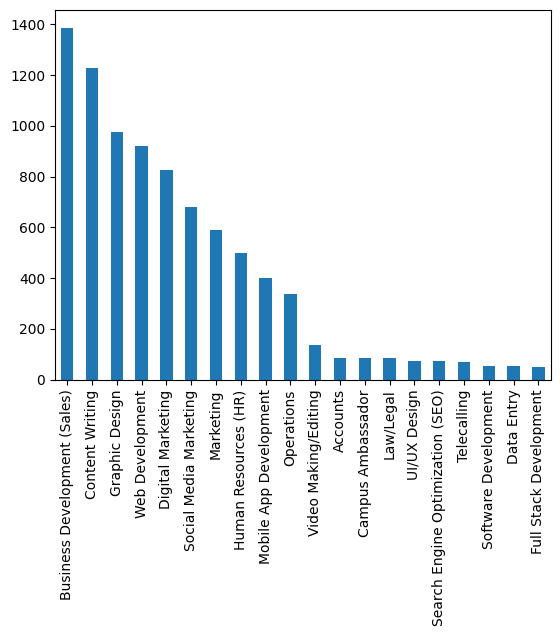

In [257]:
df.internship.value_counts()[:20].plot(kind="bar")

In [250]:
df.groupby("internship").agg({"duration":"mean"})

,duration
internship,
.NET Development,3.923077
2D & 3D Video Animation,6.000000
2D Animation,5.250000
2D Animation & Motion Graphics Design,4.500000
2D Graphic Design,3.000000
...,...
YouTube Marketing,3.250000
YouTube Video Creation,2.000000
Youth Leadership Council,6.000000


### Company

In [219]:
df.company.nunique()

6472

In [220]:
df.company.value_counts()

Protiviti                                    40
Intellify                                    36
Challenge Katta                              30
Stirring Minds                               25
Untrodden Labs                               24
                                             ..
Digidex Labs                                  1
School Of Excellence                          1
Touchpoints Communication Private Limited     1
Cactus Communications Private Limited         1
Study Sure                                    1
Name: company, Length: 6472, dtype: int64

#### Ratio of companies with start date as immediately

In [222]:
df["start date"].value_counts()

Immediately           11763
1 May - 10 Jun'20        31
1 May - 31 May'20         8
15 Apr - 25 May'20        8
15 May - 24 Jun'20        7
                      ...  
27 Apr - 10 May'20        1
15 Jun - 15 Jul'20        1
2 May - 20 May'20         1
1 Jun - 8 Jun'20          1
25 May - 31 May'20        1
Name: start date, Length: 121, dtype: int64

In [229]:
print("Ratio :",(11763/df.shape[0])*100)

Ratio : 98.05768589529843


### Duration

#### Average duration of internship

In [233]:
df.agg({"duration":"mean"})

duration    3.467989
dtype: float64

In [255]:
df.duration.value_counts()

3     4314
6     3144
2     2715
1     1161
4      544
5       93
12      11
36       8
24       6
Name: duration, dtype: int64

<Axes: ylabel='duration'>

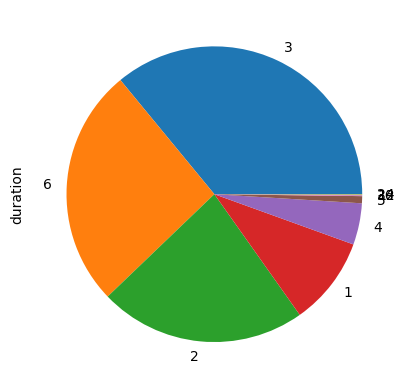

In [235]:
df.duration.value_counts().plot(kind="pie")

Number of internships during a particular duration

#### Top 10 dates when internships start

<Axes: >

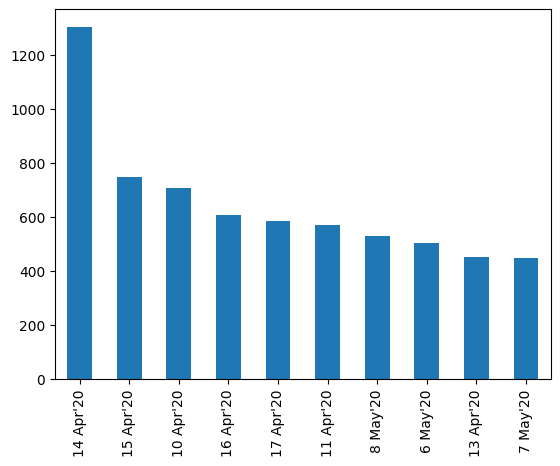

In [248]:
df["apply by"].value_counts()[:10].plot(kind="bar")

#### Location range

In [241]:
df.location.value_counts()

Work From Home                  4454
Delhi                           1301
Bangalore                        939
Mumbai                           860
Pune                             510
                                ... 
Balewadi                           1
New York (United States)           1
Dubai (United Arab Emirates)       1
Thudiyalur                         1
Mandsaur                           1
Name: location, Length: 254, dtype: int64

<Axes: ylabel='location'>

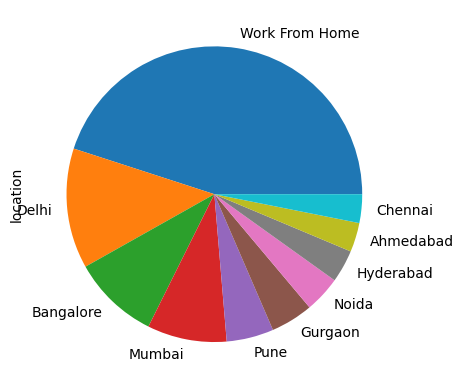

In [258]:
df.location.value_counts()[:10].plot(kind="pie")

In [254]:
print("Ratio of internships WFH:" ,(4454/len(df))*100)

Ratio of internships WFH: 37.129043014338116


## INSIGHTS

1) Maximum preferred area of internship (High to low):
<ul>
        <li>Business Development (Sales) </li>                    
        <li>Content Writing              </li>                     
        <li>Graphic Design </li>
   </ul>
2) Exactly 98.057% of companies have start date as "immediately"
3) Average duration of internship is 3.467 months
4) High number of internships are posted in months of april and may i.e. Summer internships
5) 37% of internships are WFH and major offline internships are from major cities including Delhi, Bangalore and Mumbai
6) Maximum internships are for a duration of 3, 6 or 2 months
       